In [148]:
df_1 <- read.csv("C:/Users/kgtrm/Downloads/Hooglandia Open 2  Melee.gg.csv")

In [149]:
str(df_1)
head(df_1)

'data.frame':	233 obs. of  8 variables:
 $ Rank    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Player  : chr  "Irate Nya" "Kevindevino92" "Craig Kennedy" "Ken Segura" ...
 $ Decklist: chr  "Temur Reclamation" "Jeskai Fires (Keruga)" "Jeskai Fires (Keruga)" "Four-color Yorion" ...
 $ Record  : chr  "8-1-0" "8-1-0" "8-1-0" "8-1-0" ...
 $ Points  : int  24 24 24 24 24 21 21 21 18 18 ...
 $ OMW.    : chr  "67.6896%" "63.6772%" "63.4656%" "63.4039%" ...
 $ TGW.    : chr  "72.7273%" "76.1905%" "70.8333%" "65.3846%" ...
 $ OGW.    : chr  "60.1521%" "57.8603%" "56.2174%" "59.1611%" ...


,Rank,Player,Decklist,Record,Points,OMW.,TGW.,OGW.
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,Irate Nya,Temur Reclamation,8-1-0,24,67.6896%,72.7273%,60.1521%
2,2,Kevindevino92,Jeskai Fires (Keruga),8-1-0,24,63.6772%,76.1905%,57.8603%
3,3,Craig Kennedy,Jeskai Fires (Keruga),8-1-0,24,63.4656%,70.8333%,56.2174%
4,4,Ken Segura,Four-color Yorion,8-1-0,24,63.4039%,65.3846%,59.1611%
5,5,Hedon,Jeskai Fires (Keruga),8-1-0,24,57.1076%,69.5652%,54.0679%
6,6,Brad Nelson,Temur Reclamation,7-2-0,21,64.8236%,65.2174%,60.3917%


In [89]:
library(tidyr)
library(dplyr)

In [90]:
convert_record_to_wld <- function(record) {
    wld <- strsplit(record, '-')
    # note that strsplit creates a list whose first element is a list of characters
    wld <- wld[[1]]
    # make it just a list of characters
    # initialize empty vector for numbers
    wld_nums <- c()
    for (i in 1:length(wld)) {
        wld_nums <- append(wld_nums, as.numeric(wld[i]))
    }
    return(wld_nums)
}

convert_record_to_wld("10-1-0")

[1] 10  1  0

In [181]:
df_decks <- df_1 %>%
    rowwise %>%
    mutate(wins = convert_record_to_wld(Record)[1], 
           losses = convert_record_to_wld(Record)[2], 
           draws = convert_record_to_wld(Record)[3])

df_deck_groups <- df_decks %>%
    group_by(Decklist) %>%
    summarize(total_wins = sum(wins), 
              total_losses = sum(losses), 
              total_draws = sum(draws), 
              win_pct = 100 * total_wins / (total_wins + total_losses)) %>%
    filter(total_wins + total_losses + total_draws >= 10) %>%
    arrange(desc(win_pct))

df_deck_groups$win_pct.buckets <- cut(df_deck_groups$win_pct,
                                c(0, 10, 20, 30, 40, 50, 60, 70, 80, 90))
df_deck_groups

Decklist,total_wins,total_losses,total_draws,win_pct,win_pct.buckets
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Boros Discard,14,6,0,70.00000,"(60,70]"
Bant Control,9,4,0,69.23077,"(60,70]"
Mono-Black Aggrro,9,4,0,69.23077,"(60,70]"
Temur Adventures (Obosh),9,4,0,69.23077,"(60,70]"
Temur Reclamation,39,21,0,65.00000,"(60,70]"
Four-color Fires,13,8,0,61.90476,"(60,70]"
Azorius Control,12,8,0,60.00000,"(50,60]"
Esper Hero,6,4,0,60.00000,"(50,60]"
Mono-Red Aggro â„,9,6,0,60.00000,"(50,60]"


In [92]:
library(ggplot2)

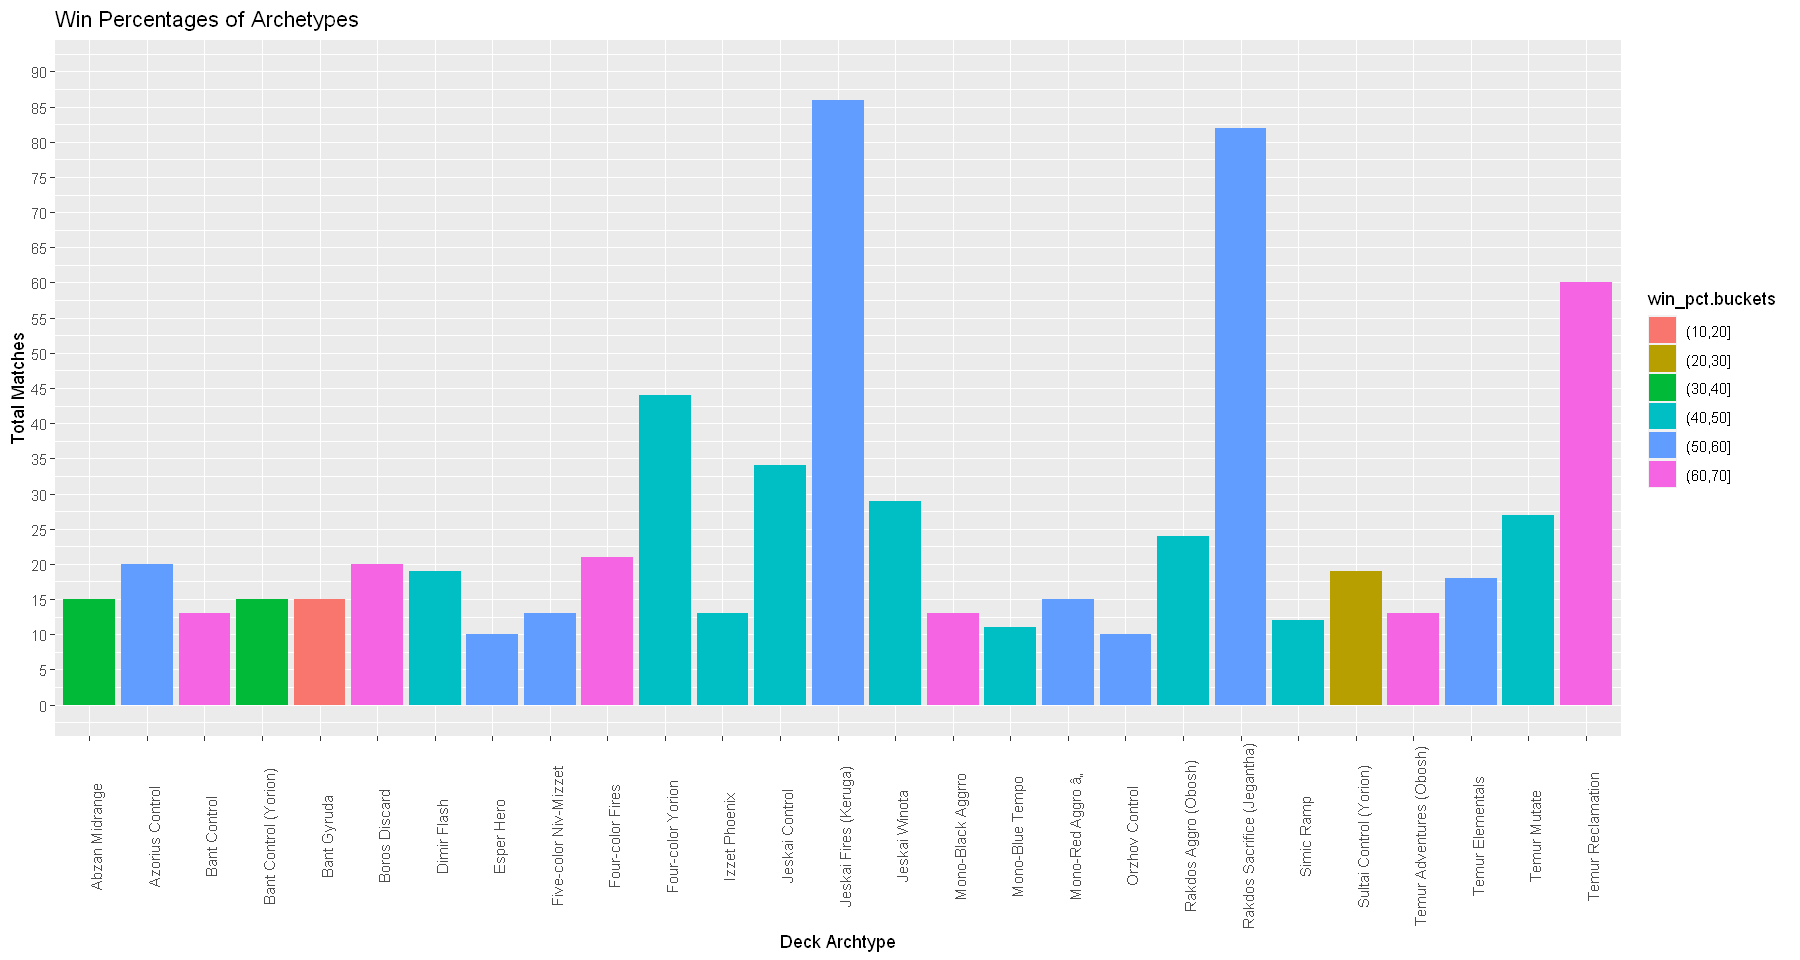

In [184]:
options(repr.plot.width=15, repr.plot.height=8)

ggplot(aes(x = Decklist, y = total_wins + total_losses), data = df_deck_groups) +
    geom_bar(stat = "identity", aes(fill = win_pct.buckets)) +
    scale_fill_discrete() +
    scale_y_continuous(limits = c(0, 90), breaks = seq(0, 90, 5)) +
    theme(axis.text.x = element_text(angle = 90)) + 
    labs(title = "Win Percentages of Archetypes", x = "Deck Archtype", y = "Total Matches")